# Capstone Project two: EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

Before processing the data has following features

In [2]:
RUL_raw = pd.read_csv("../data/Raw_data/Battery_RUL.csv").drop(["Cycle_Index"], axis=1)

## Raw Data Visualization 

### Pairplot

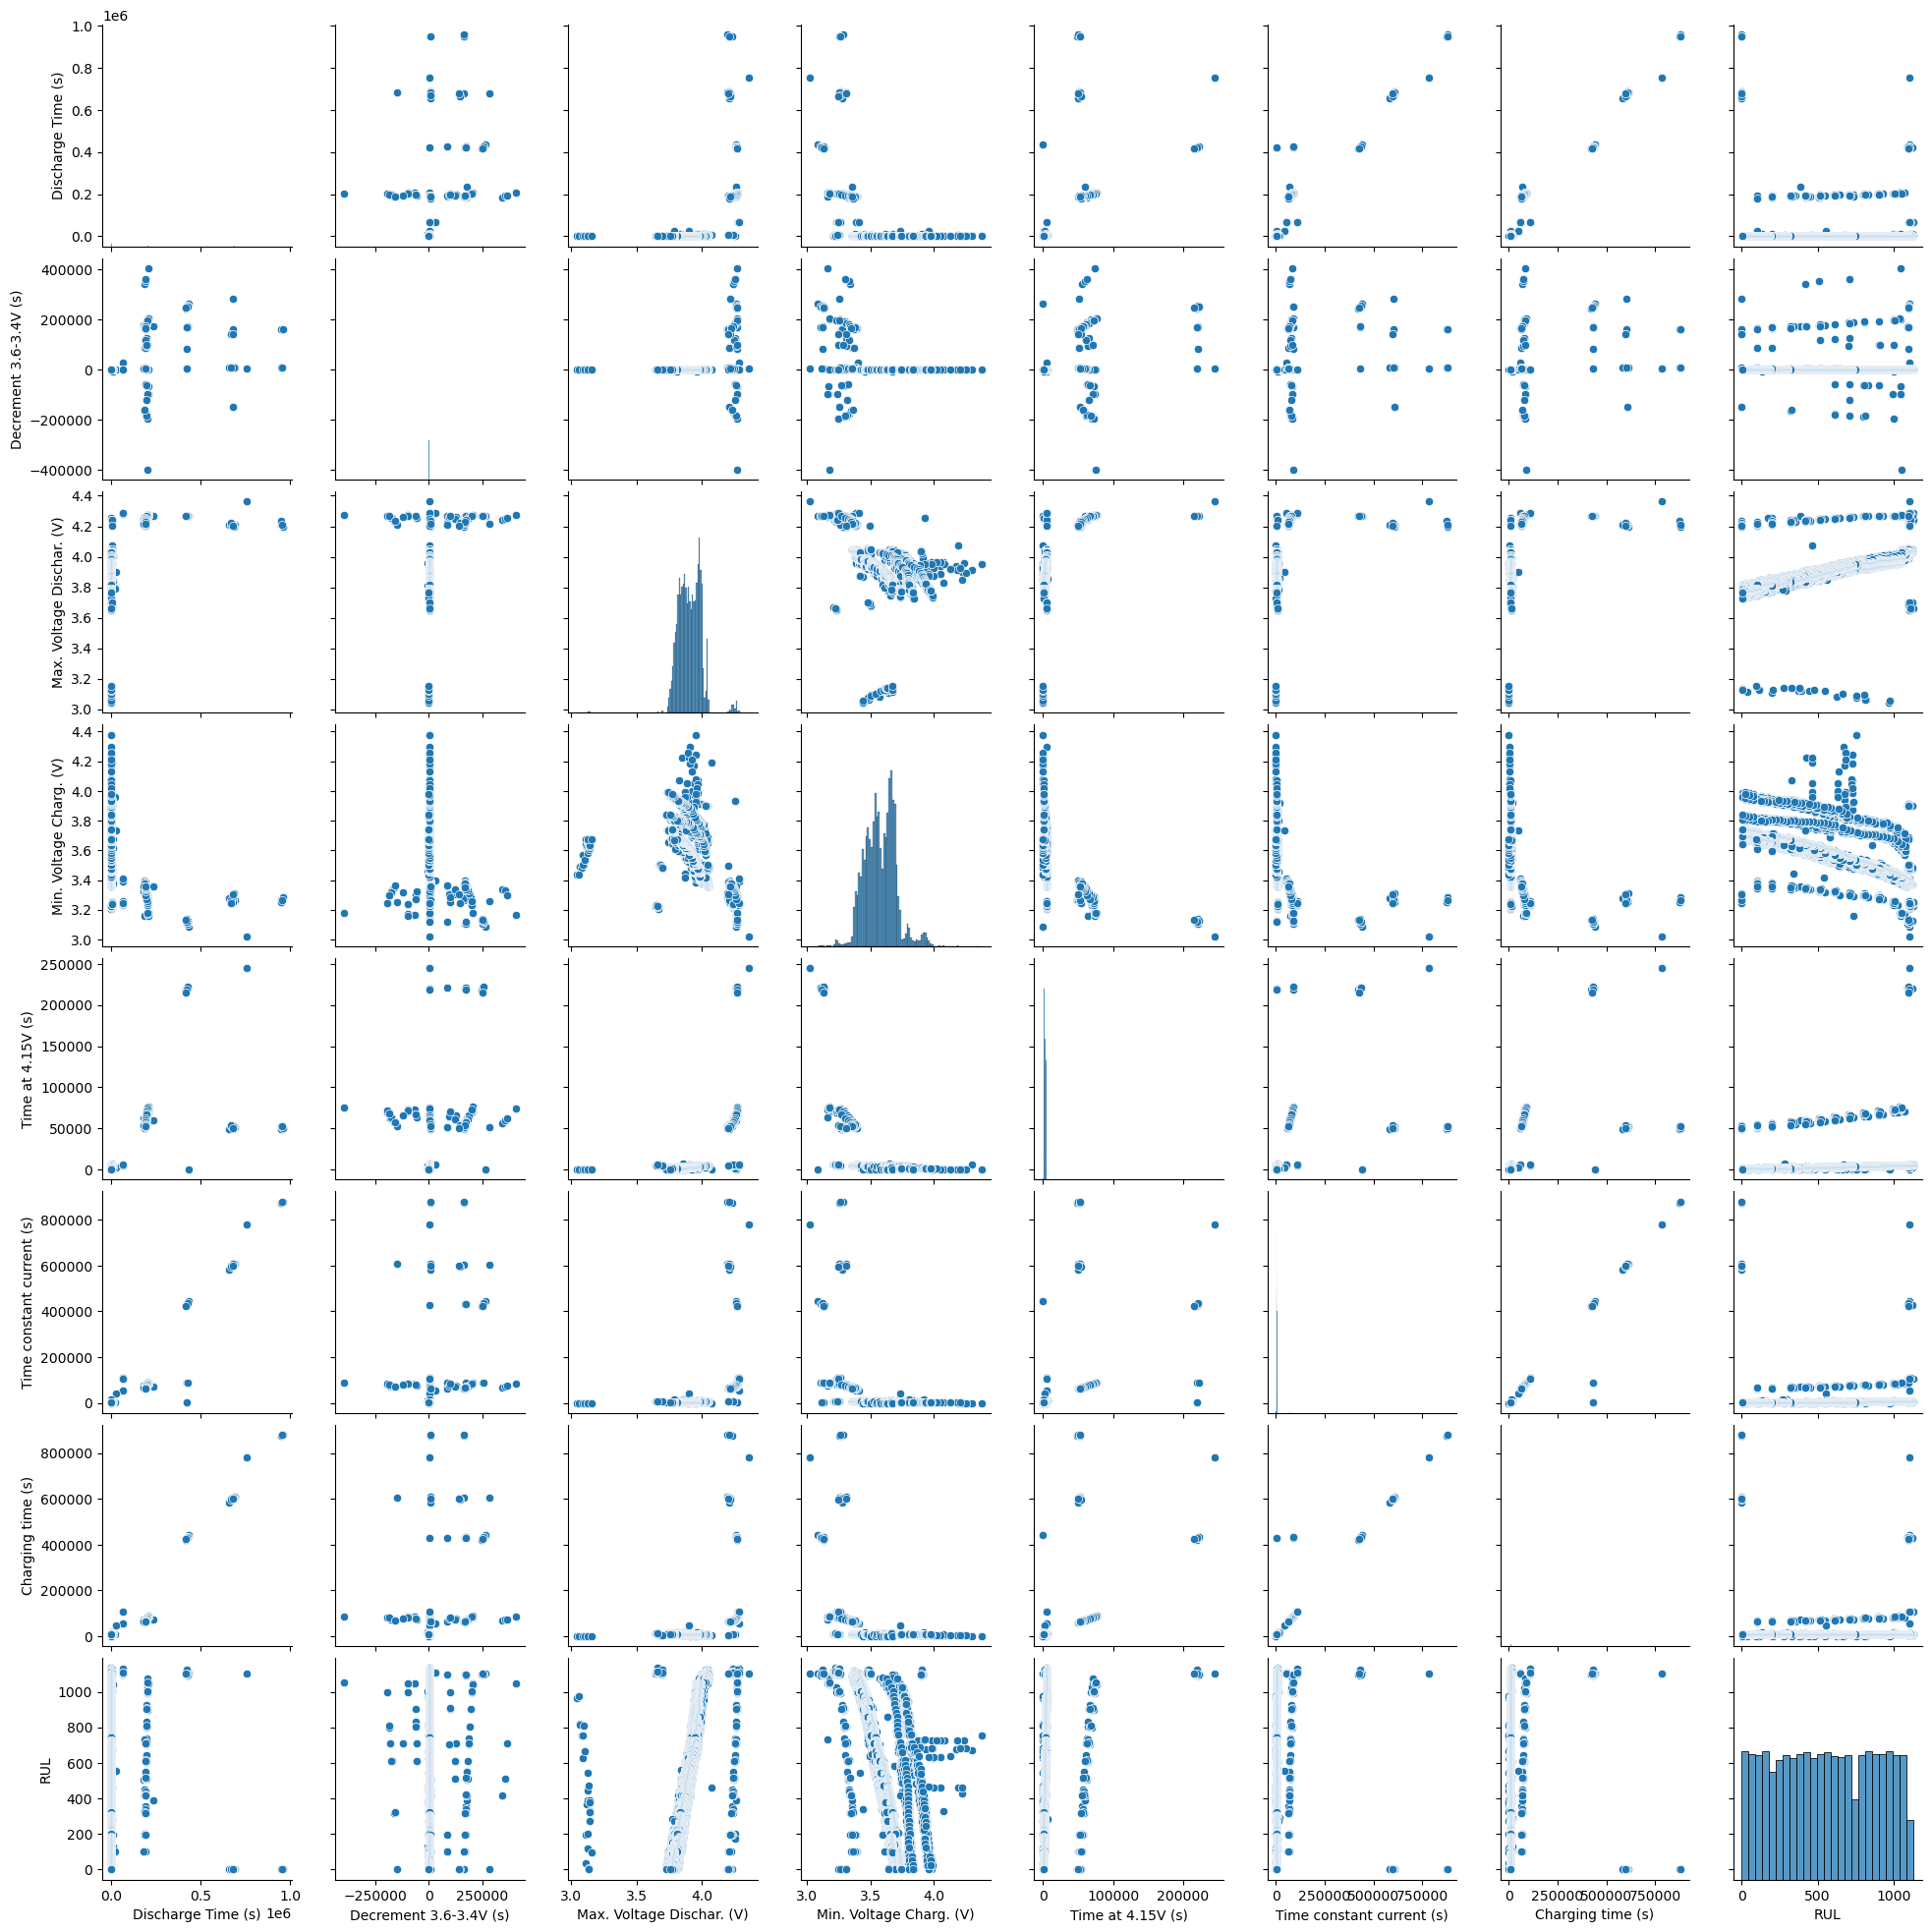

In [3]:
sns.pairplot(RUL_raw)

### Boxplot

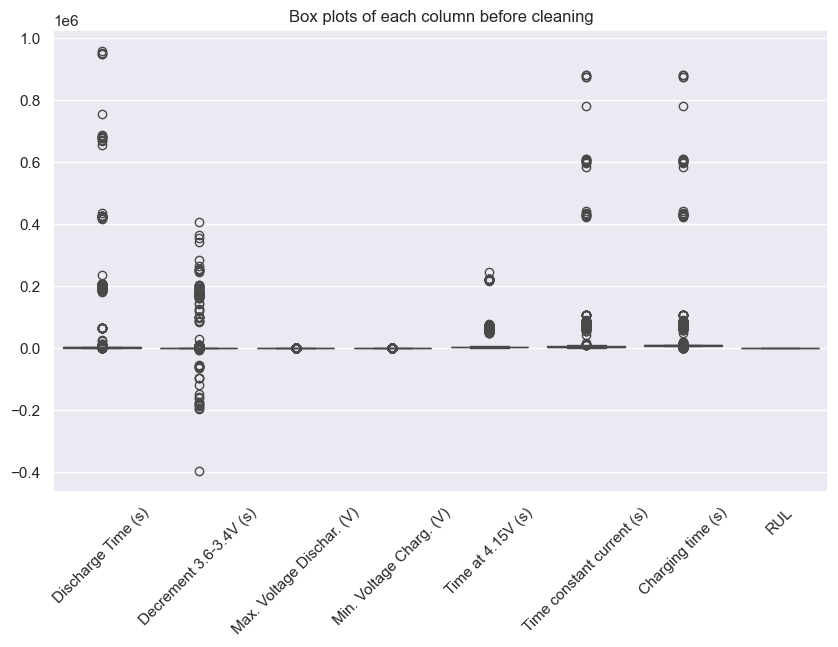

In [4]:
sns.set()
plt.figure(figsize=(10, 6))
sns.boxplot(data=RUL_raw)
plt.title('Box plots of each column before cleaning')
plt.xticks(rotation=45)
plt.show()

### Correlation heatmap

<Axes: >

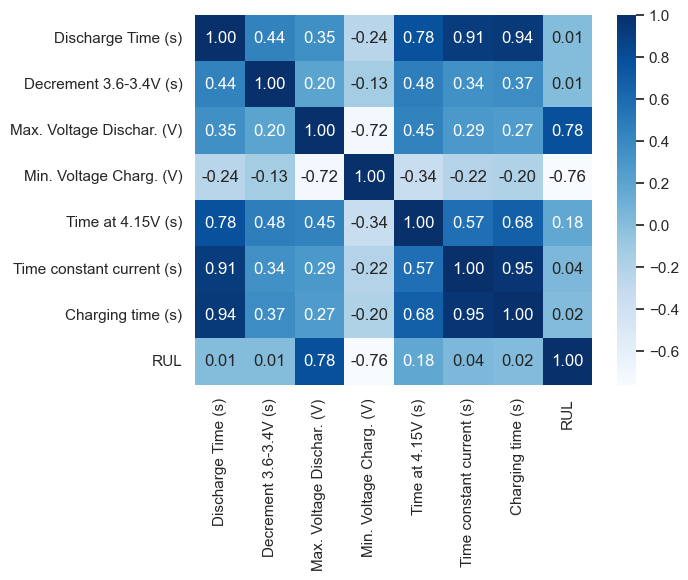

In [5]:
sns.heatmap(RUL_raw.corr(),annot=True, cmap='Blues', fmt='.2f')

In [6]:
RUL_cleaned = pd.read_csv("../data/Interim/RUL_interim.csv").drop(["Cycle_Index"], axis=1)

## Cleaned Data Visualization

### Pairplot

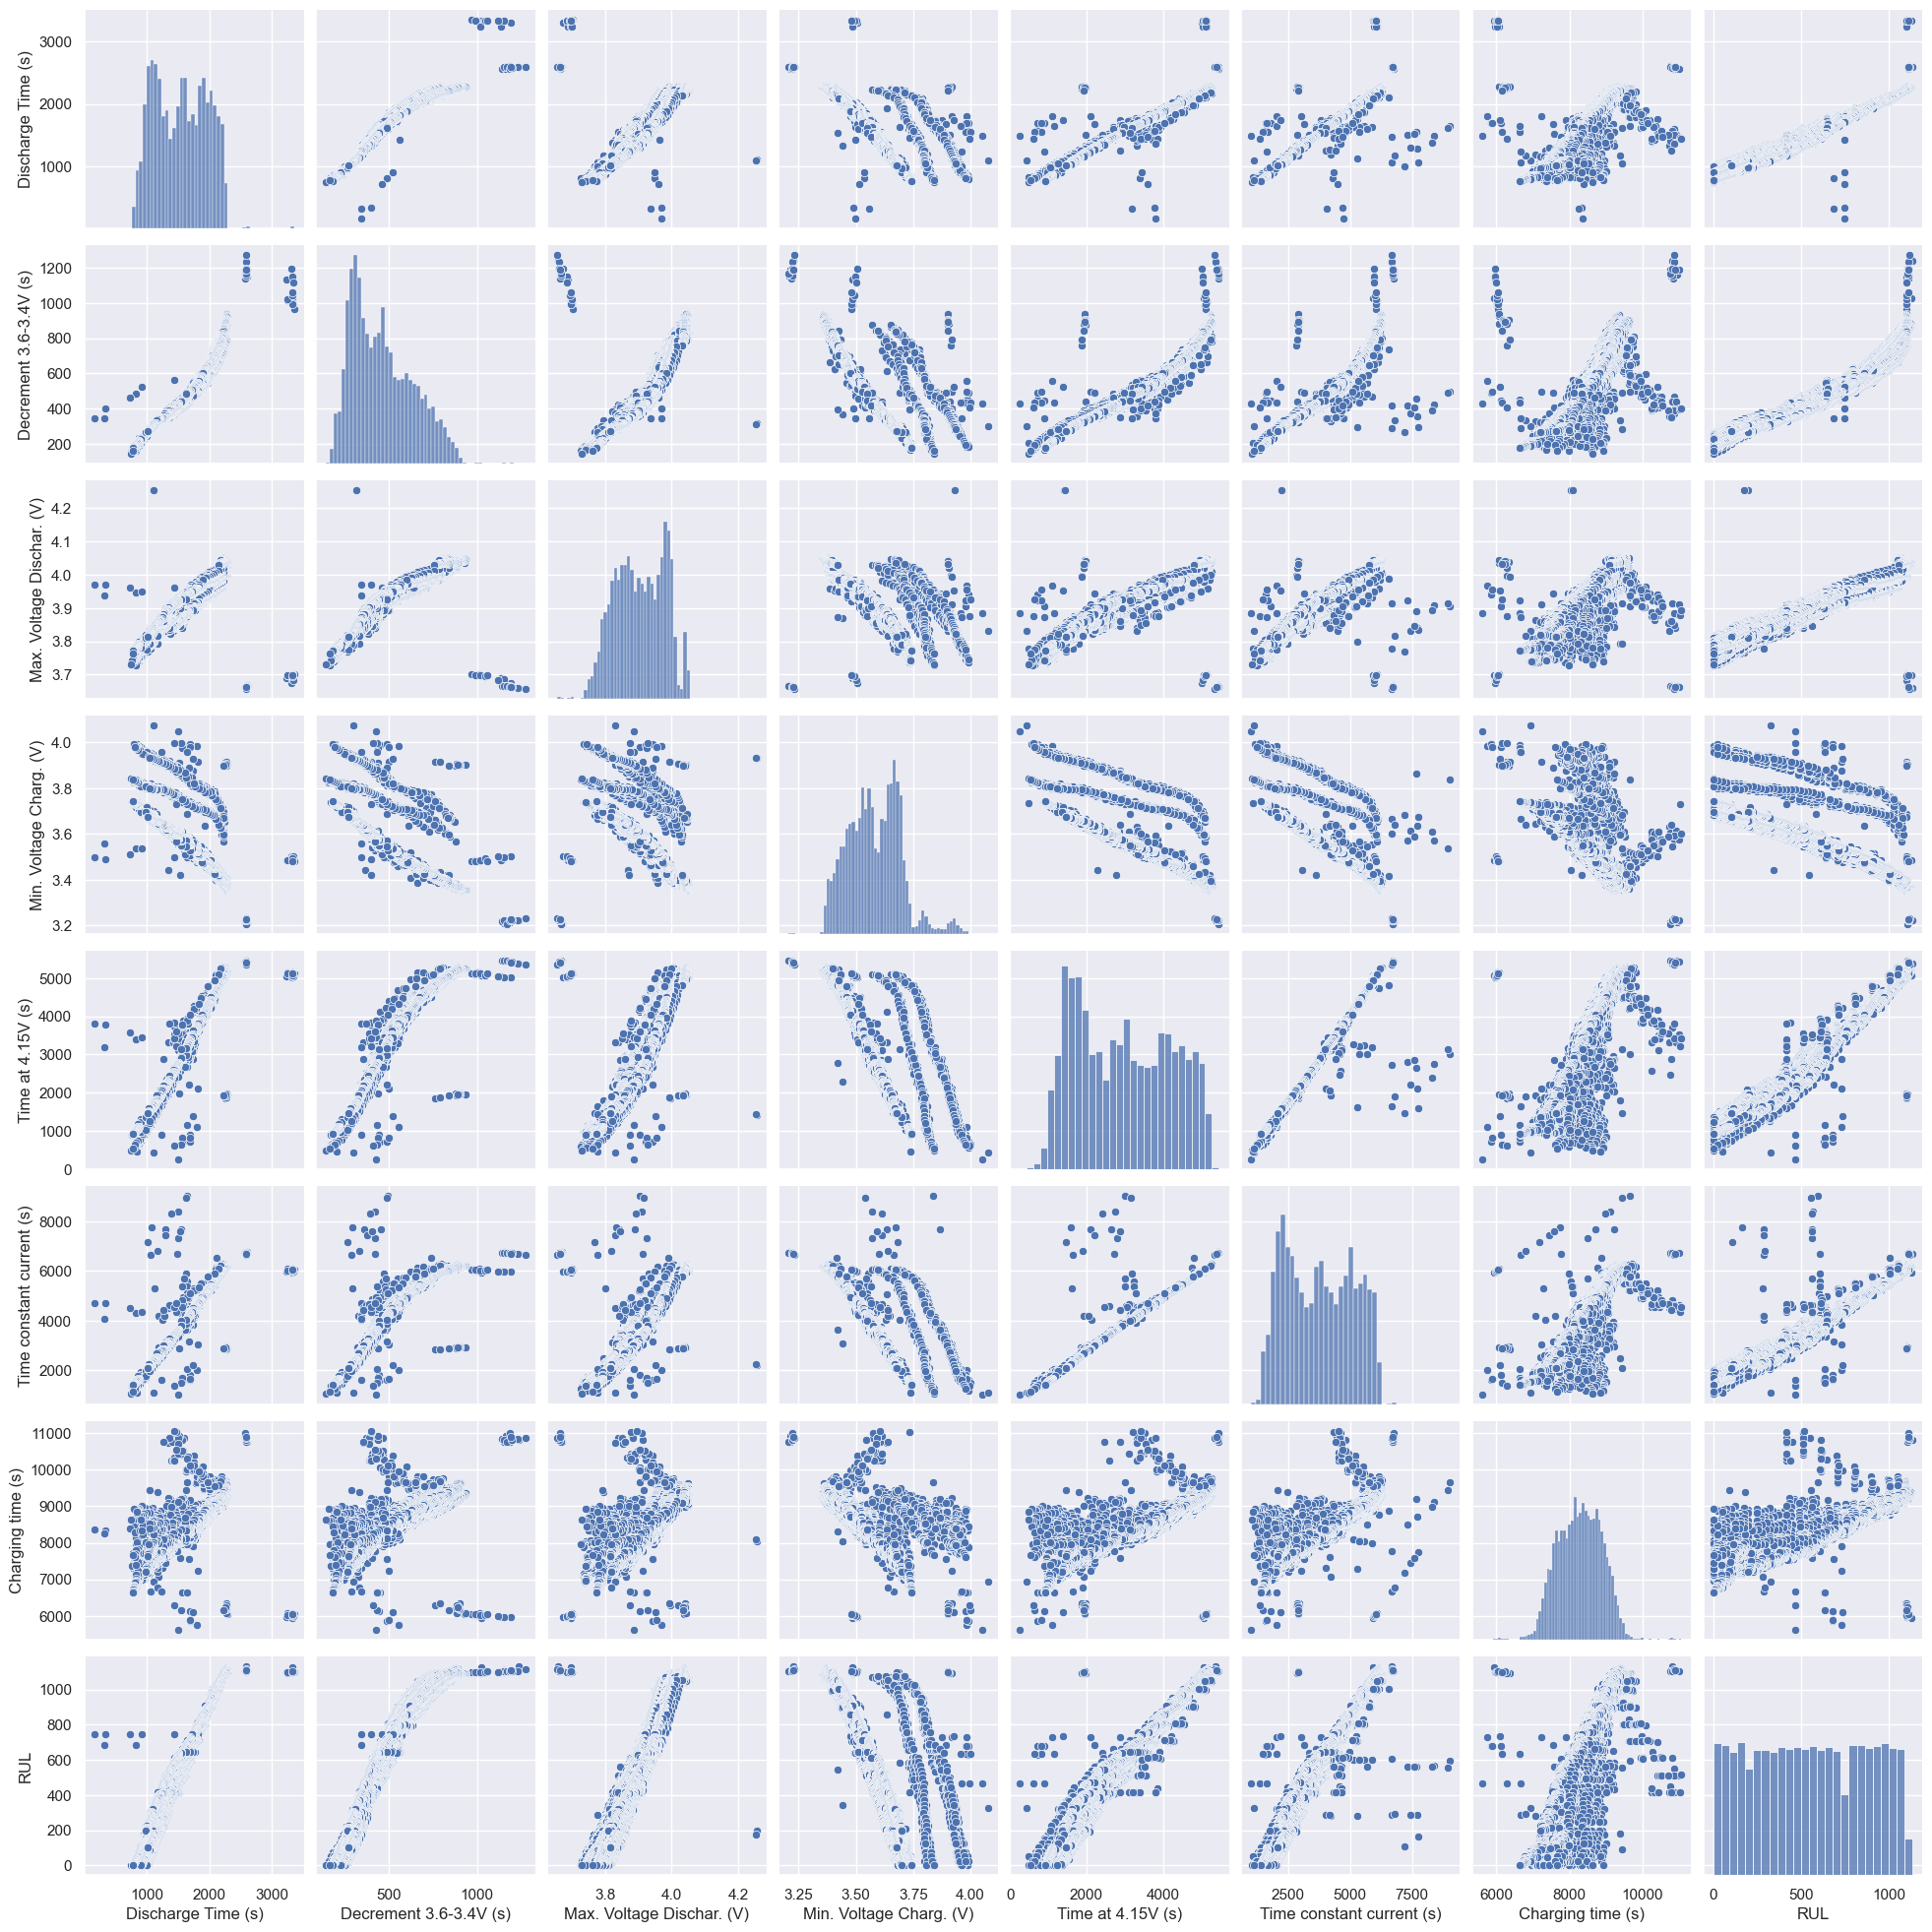

In [7]:
sns.pairplot(RUL_cleaned)

### Boxplot

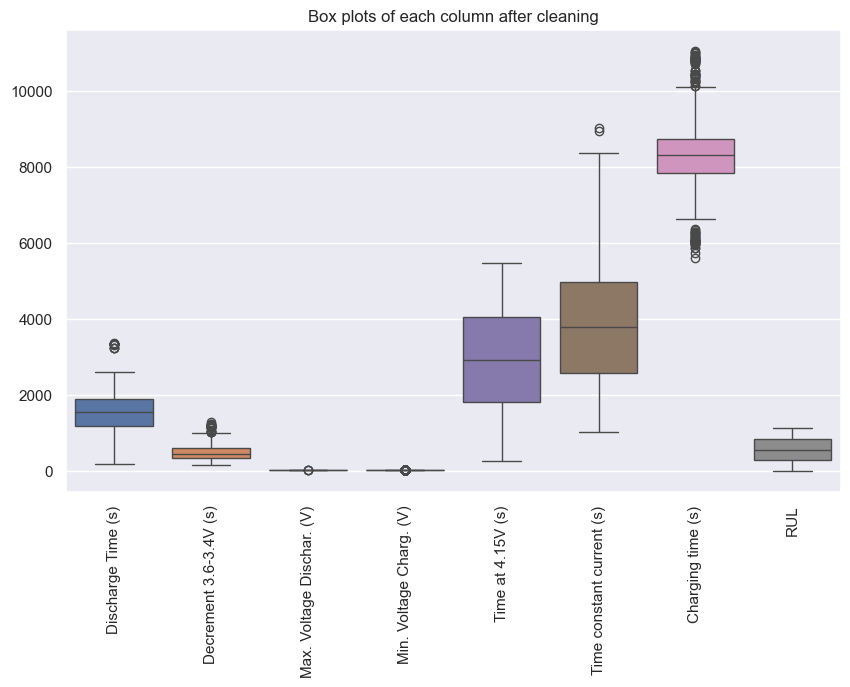

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=RUL_cleaned)
plt.title('Box plots of each column after cleaning')
plt.xticks(rotation=90)
plt.show()

### Correlation heatmap

<Axes: >

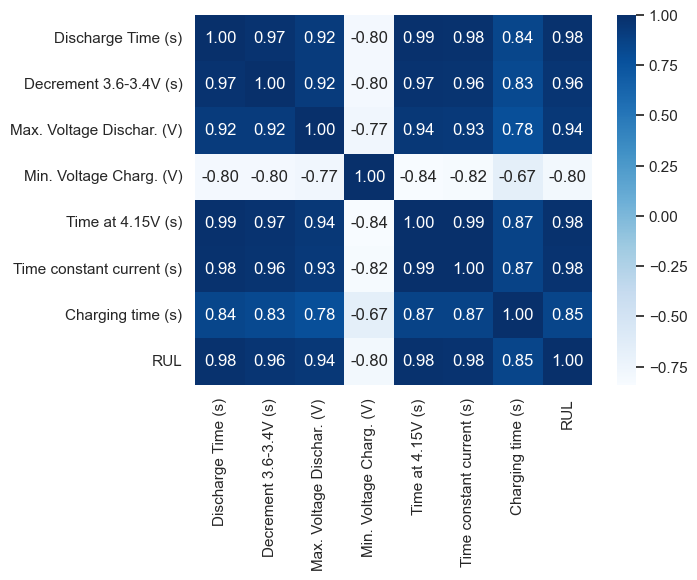

In [9]:
sns.heatmap(RUL_cleaned.corr(),annot=True, cmap='Blues', fmt='.2f')

**This suggests that the source of very small correlation among some of the features were the outliers or machine errors.** 

In [10]:
abs(RUL_cleaned.corr()).mean().sort_values(ascending=False)

Time at 4.15V (s)            0.947048
Time constant current (s)    0.942863
Discharge Time (s)           0.936201
RUL                          0.935998
Decrement 3.6-3.4V (s)       0.927341
Max. Voltage Dischar. (V)    0.899457
Charging time (s)            0.838533
Min. Voltage Charg. (V)      0.812297
dtype: float64

In [11]:
sorted_columns = [
    'Time at 4.15V (s)',
    'Time constant current (s)',
    'Discharge Time (s)',
    'Decrement 3.6-3.4V (s)',
    'Max. Voltage Dischar. (V)',
    'Charging time (s)',
    'Min. Voltage Charg. (V)',
    'RUL'
]
RUL_cleaned = RUL_cleaned[sorted_columns]

## Sactterplot `Time at 4.15V (s)` vs all other features

However, downfall of this is that now most of the features seems to be strongly correlating. Let us look at the feature "Time at 4.15V (s)" to visualize it's correlation with other features. 

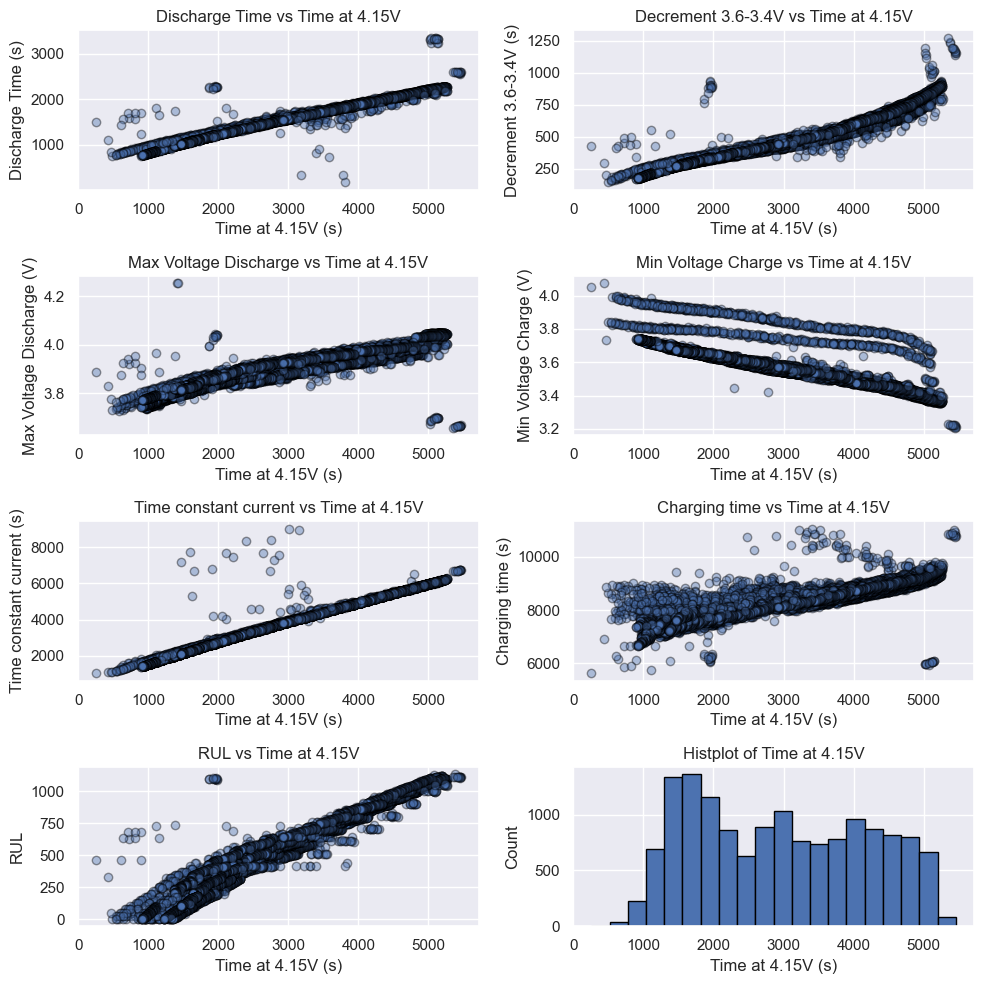

In [12]:
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# Scatter plots with titles and axis labels
axs[0, 0].scatter(RUL_cleaned["Time at 4.15V (s)"], RUL_cleaned["Discharge Time (s)"], edgecolors="black", alpha=0.4)
axs[0, 0].set_title("Discharge Time vs Time at 4.15V")
axs[0, 0].set_xlabel("Time at 4.15V (s)")
axs[0, 0].set_ylabel("Discharge Time (s)")

axs[0, 1].scatter(RUL_cleaned["Time at 4.15V (s)"], RUL_cleaned["Decrement 3.6-3.4V (s)"], edgecolors="black", alpha=0.4)
axs[0, 1].set_title("Decrement 3.6-3.4V vs Time at 4.15V")
axs[0, 1].set_xlabel("Time at 4.15V (s)")
axs[0, 1].set_ylabel("Decrement 3.6-3.4V (s)")

axs[1, 0].scatter(RUL_cleaned["Time at 4.15V (s)"], RUL_cleaned["Max. Voltage Dischar. (V)"], edgecolors="black", alpha=0.4)
axs[1, 0].set_title("Max Voltage Discharge vs Time at 4.15V")
axs[1, 0].set_xlabel("Time at 4.15V (s)")
axs[1, 0].set_ylabel("Max Voltage Discharge (V)")

axs[1, 1].scatter(RUL_cleaned["Time at 4.15V (s)"], RUL_cleaned["Min. Voltage Charg. (V)"], edgecolors="black", alpha=0.4)
axs[1, 1].set_title("Min Voltage Charge vs Time at 4.15V")
axs[1, 1].set_xlabel("Time at 4.15V (s)")
axs[1, 1].set_ylabel("Min Voltage Charge (V)")

axs[2, 0].scatter(RUL_cleaned["Time at 4.15V (s)"], RUL_cleaned["Time constant current (s)"], edgecolors="black", alpha=0.4)
axs[2, 0].set_title("Time constant current vs Time at 4.15V")
axs[2, 0].set_xlabel("Time at 4.15V (s)")
axs[2, 0].set_ylabel("Time constant current (s)")

axs[2, 1].scatter(RUL_cleaned["Time at 4.15V (s)"], RUL_cleaned["Charging time (s)"], edgecolors="black", alpha=0.4)
axs[2, 1].set_title("Charging time vs Time at 4.15V")
axs[2, 1].set_xlabel("Time at 4.15V (s)")
axs[2, 1].set_ylabel("Charging time (s)")

axs[3, 0].scatter(RUL_cleaned["Time at 4.15V (s)"], RUL_cleaned["RUL"], edgecolors="black", alpha=0.4)
axs[3, 0].set_title("RUL vs Time at 4.15V")
axs[3, 0].set_xlabel("Time at 4.15V (s)")
axs[3, 0].set_ylabel("RUL")

axs[3, 1].hist(RUL_cleaned["Time at 4.15V (s)"], edgecolor="black",bins = 20)
axs[3, 1].set_title("Histplot of Time at 4.15V")
axs[3, 1].set_xlabel("Time at 4.15V (s)")
axs[3, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()


## PCA Analysis

Assigning `RUL` as target.

In [13]:
X = RUL_cleaned.drop(["RUL"], axis=1)
y = RUL_cleaned["RUL"]

Let us run PCA analysis to check the dimensionality of the data. But, first let us standardize it by using `StandardScaler()`.

In [14]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [15]:
X_scaled.describe()

,Time at 4.15V (s),Time constant current (s),Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Charging time (s),Min. Voltage Charg. (V)
count,1.469600e+04,1.469600e+04,1.469600e+04,1.469600e+04,1.469600e+04,1.469600e+04,1.469600e+04
mean,-2.784925e-16,-1.315104e-16,1.160386e-17,-1.547181e-17,4.007198e-15,8.992988e-16,-2.773321e-15
std,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00
min,-2.195531e+00,-2.054655e+00,-3.345824e+00,-1.845644e+00,-3.357810e+00,-4.432043e+00,-3.213458e+00
25%,-9.245510e-01,-9.079816e-01,-9.098638e-01,-8.423878e-01,-8.046943e-01,-7.444050e-01,-7.601520e-01
50%,-4.520796e-02,-1.178836e-03,2.090157e-02,-1.671256e-01,-3.450546e-03,2.096185e-02,-5.920738e-02
75%,8.815449e-01,8.789214e-01,8.683160e-01,7.254019e-01,8.792756e-01,7.509794e-01,7.015740e-01
max,2.035672e+00,3.883079e+00,4.416966e+00,4.645389e+00,4.763271e+00,4.591381e+00,4.214845e+00


In [16]:
pca = PCA(random_state=123)
pca.fit(X_scaled)

PCA(random_state=123)

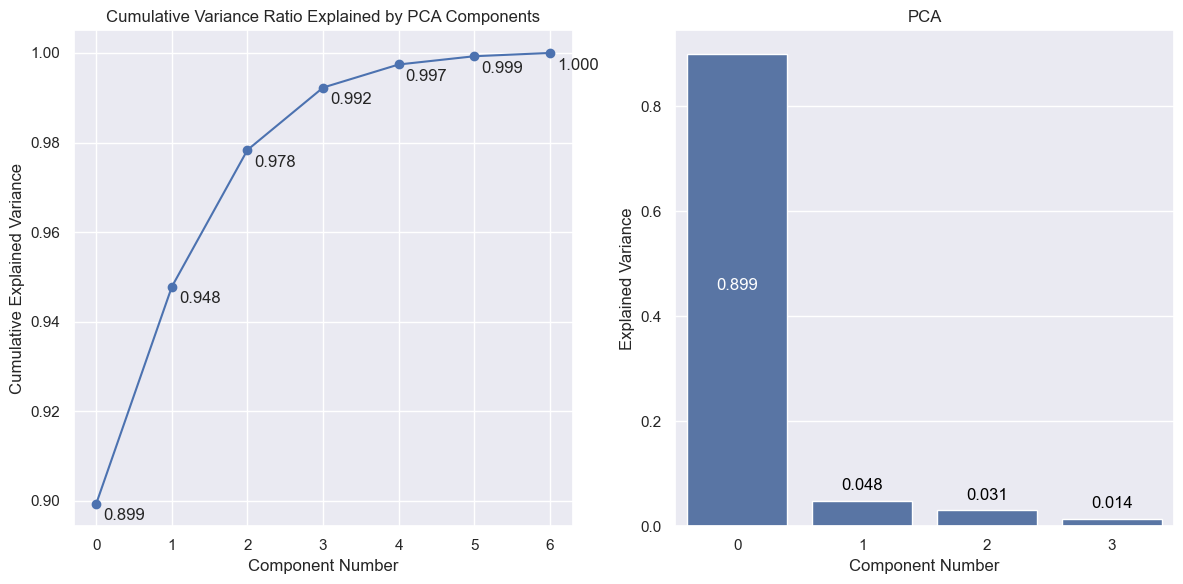

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(pca.explained_variance_ratio_.cumsum(), marker='o')
ax1.set_xlabel("Component Number")
ax1.set_ylabel("Cumulative Explained Variance")
ax1.set_title("Cumulative Variance Ratio Explained by PCA Components")
for i, ratio in enumerate(pca.explained_variance_ratio_.cumsum()):
    ax1.annotate(f'{ratio:.3f}', (i, ratio), textcoords="offset points", xytext=(5, -12))

ex_var = pca.explained_variance_ratio_
ax2 = sns.barplot(x=[0, 1, 2, 3], y=ex_var[:4], ax=ax2)
ax2.set_title('PCA')
ax2.set_xlabel('Component Number')
ax2.set_ylabel('Explained Variance')

ax2.text(0, ex_var[0] / 2, round(ex_var[0], 3), color='white', ha='center')
ax2.text(1, ex_var[1] + 0.02, round(ex_var[1], 3), color='black', ha='center')
ax2.text(2, ex_var[2] + 0.02, round(ex_var[2], 3), color='black', ha='center')
ax2.text(3, ex_var[3] + 0.02, round(ex_var[3], 3), color='black', ha='center')

plt.tight_layout()
plt.show()

The data is almost one dimensional. One could consider it to be of 2 dimensional which expalians almost 95% of variance.

## Conclusions

Here during EDA step of the project we visaulized the raw and cleaned data and also carried out PCA analysis to discover following.

* Outliers and errors were the reason behind poor correlation between some of the features.
* Removing those ouliers and errors showed very strong correlation among the features.
* Further, the PCA analysis showed the data is basically a one dimensional. 

In [18]:
RUL_cleaned.to_csv('../data/Interim/RUL_interim2.csv', index=False)